# Zadanie 6

Celem ćwiczenia jest implementacja algorytmu Q-learning.

Następnie należy stworzyć agenta rozwiązującego problem [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/). Problem dostępny jest w pakiecie **gym**.

Punktacja (max 7 pkt):
- Implementacja algorytmu Q-learning. [3 pkt]
- Eksperymenty dla różnych wartości hiperparametrów [2 pkt]
- Jakość kodu [1 pkt]
- Wnioski [1 pkt]

Polecane źródła - teoria + intuicja:
- https://distill.pub/2019/paths-perspective-on-value-learning/
- https://www.youtube.com/watch?v=0iqz4tcKN58&ab_channel=SteveBrunton

In [122]:
import numpy as np
import matplotlib.pyplot as plt


In [123]:
class QLearningSolver:
    """Class containing the Q-learning algorithm that might be used for different discrete environments."""

    def __init__(
        self,
        observation_space: int,
        action_space: int,
        learning_rate: float = 0.1,
        gamma: float = 0.9,
        epsilon: float = 0.1,
    ):
        self.observation_space = observation_space
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon

        # Initialize the Q-table with zeros
        self.q_table = np.zeros((observation_space, action_space))

    def __call__(self, state: int, action: int) -> float:
        """Return Q-value of given state and action."""
        return self.q_table[state, action]

    def update(self, state: int, action: int, reward: float, next_state: int) -> None:
        """Update Q-value of given state and action."""
        # Get the maximum Q-value for the next state
        max_next_q = np.max(self.q_table[next_state])

        # Update Q-value using the Q-learning update rule
        self.q_table[state, action] += self.learning_rate * (
            reward + self.gamma * max_next_q - self.q_table[state, action]
        )

    def get_best_action(self, state: int) -> int:
        """Return action that maximizes Q-value for a given state."""
        return np.argmax(self.q_table[state])

    def select_action(self, state: int) -> int:
        """Select an action using epsilon-greedy strategy."""
        if np.random.random() < self.epsilon:
            # Explore: choose a random action
            return np.random.randint(self.action_space)
        else:
            # Exploit: choose the best action
            return self.get_best_action(state)

    def __repr__(self):
        """Elegant representation of Q-learning solver."""
        return (
            f"QLearningSolver(observation_space={self.observation_space}, "
            f"action_space={self.action_space}, learning_rate={self.learning_rate}, "
            f"gamma={self.gamma}, epsilon={self.epsilon})"
        )

    def __str__(self):
        return self.__repr__()


# Eksperymenty

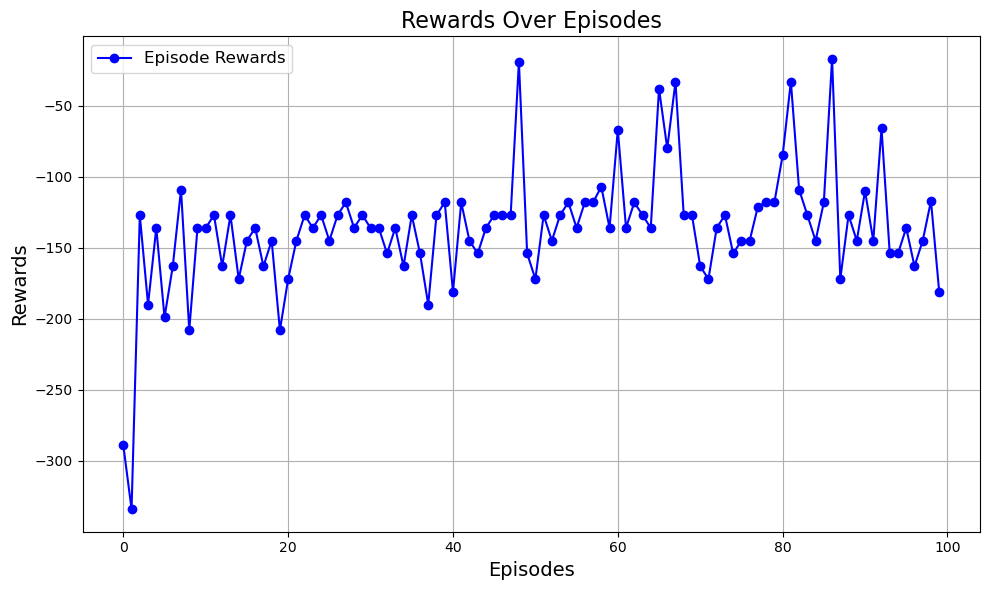

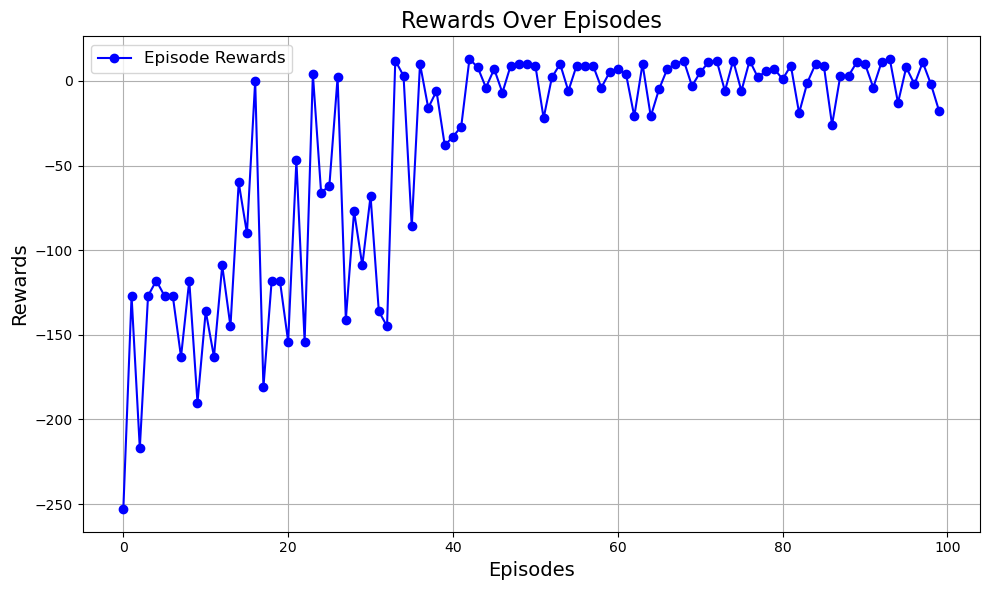

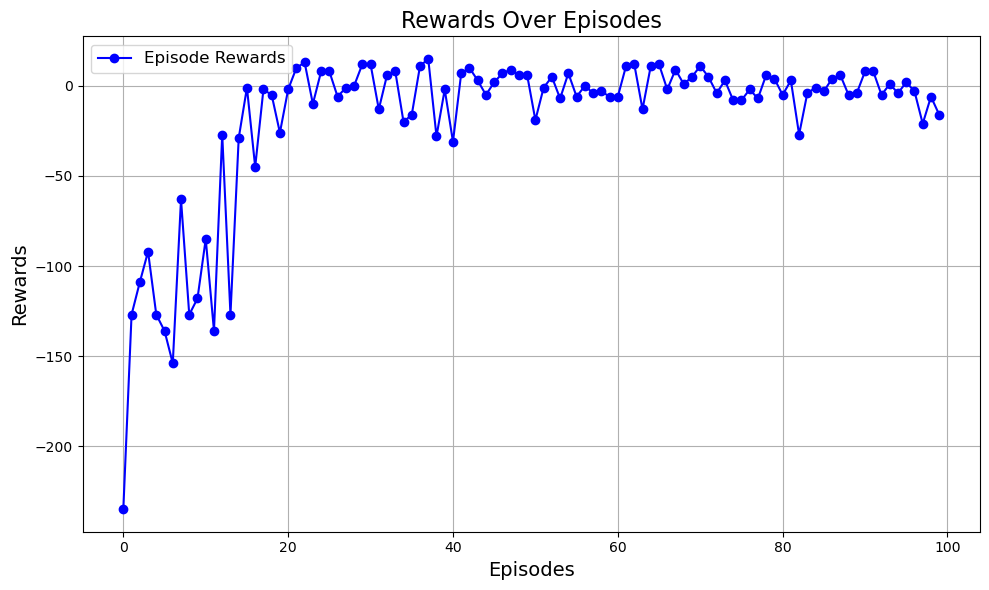

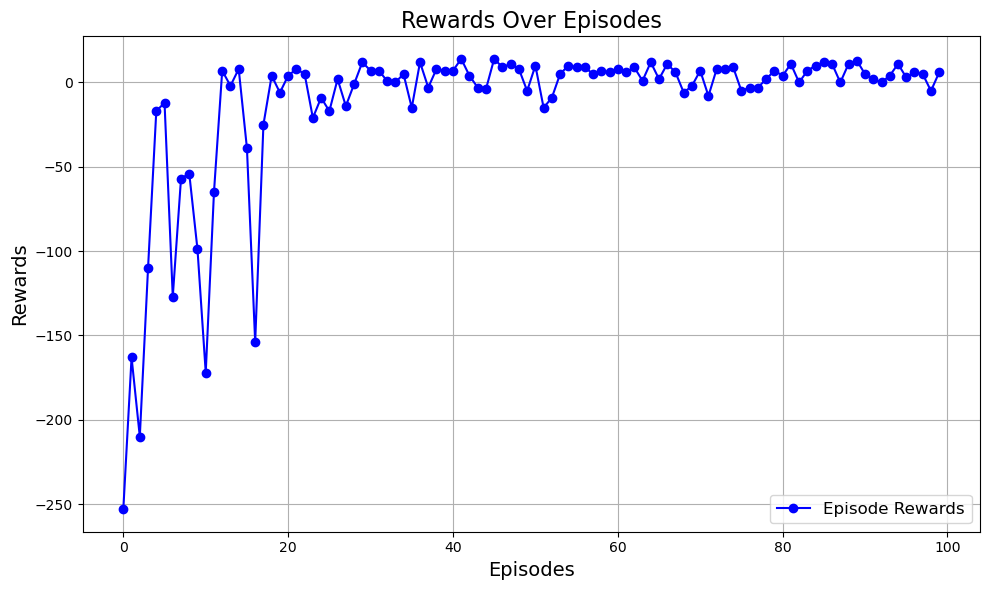

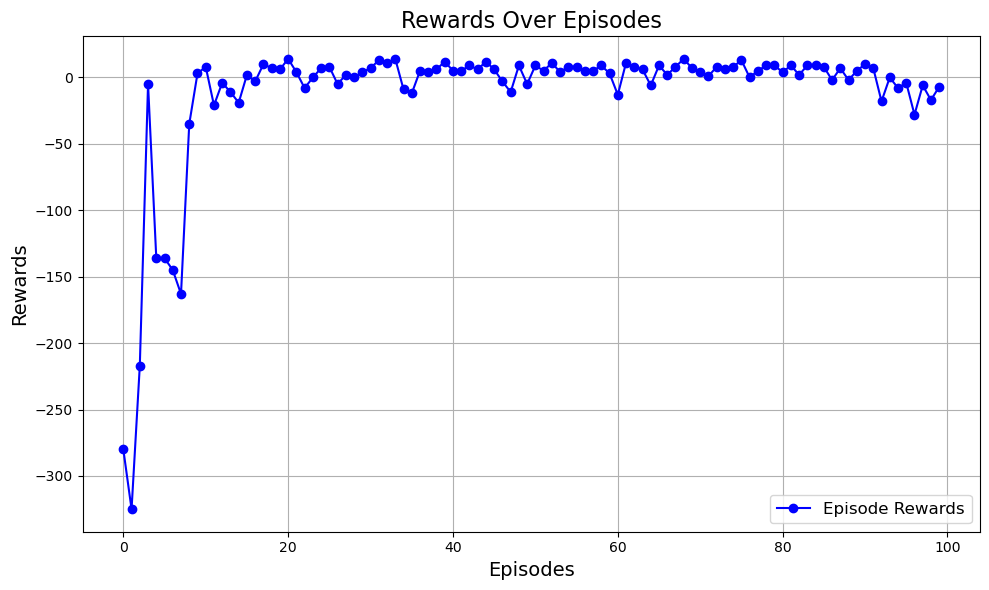

C:\Users\sledz\AppData\Local\Temp\ipykernel_5684\611129446.py:31: RuntimeWarning: overflow encountered in scalar multiply
  self.q_table[state, action] += self.learning_rate * (
C:\Users\sledz\AppData\Local\Temp\ipykernel_5684\611129446.py:32: RuntimeWarning: invalid value encountered in scalar subtract
  reward + self.gamma * max_next_q - self.q_table[state, action]
C:\Users\sledz\AppData\Local\Temp\ipykernel_5684\611129446.py:31: RuntimeWarning: invalid value encountered in scalar add
  self.q_table[state, action] += self.learning_rate * (


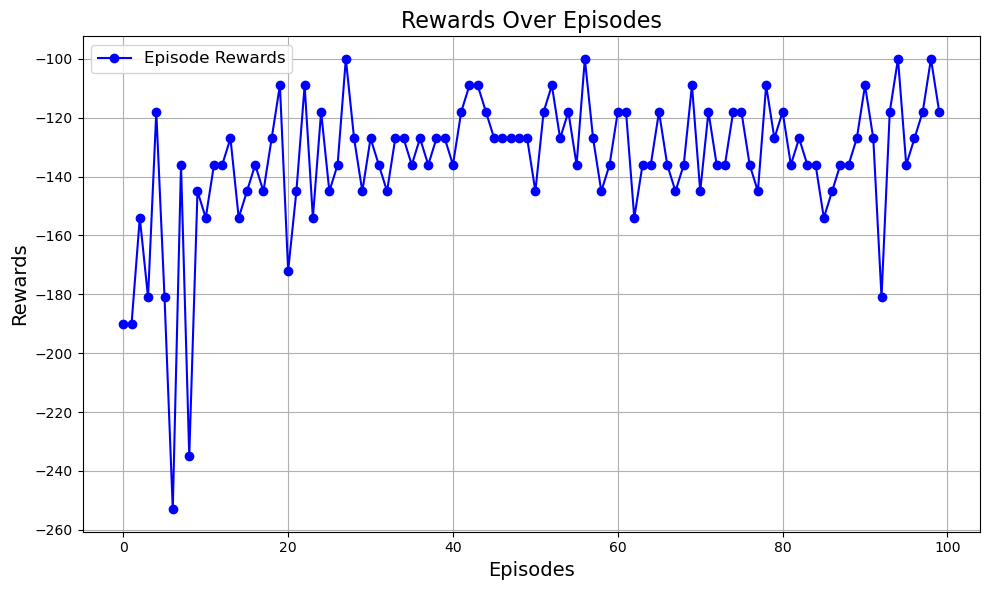

In [124]:
import sys
# sys.path.append("C:/Users/sledz/AppData/Roaming/Python/Python312/site-packages")
# import gymnasium as gym

# Initialize the Taxi environment
env = gym.make("Taxi-v3")

def train(learning_rate=0.1, gamma=0.9, epsilon=0.1, episodes=100, max_steps_per_episode=100):
    # Create the Q-learning solver
    solver = QLearningSolver(
        observation_space=env.observation_space.n,
        action_space=env.action_space.n,
        learning_rate=learning_rate,
        gamma=gamma,
        epsilon=epsilon
    )

    rewards_all_episodes = []

    # Training loop
    for episode in range(episodes):
        state, _ = env.reset()
        total_rewards = 0

        for step in range(max_steps_per_episode):
            # Choose action using epsilon-greedy strategy
            action = solver.select_action(state)

            # Perform the action in the environment
            next_state, reward, done, truncated, _ = env.step(action)

            # Update the Q-table
            solver.update(state, action, reward, next_state)

            state = next_state
            total_rewards += reward

            if done or truncated:
                break

        rewards_all_episodes.append(total_rewards)
    return rewards_all_episodes

def plot(rewards_list,jump_length=1, title="Rewards Over Episodes", x_label="Episodes", y_label="Rewards"):
    # Plot the rewards
    rewards_list = rewards_list[::jump_length]
    plt.figure(figsize=(10, 6))
    plt.plot(rewards_list, label="Episode Rewards", color="blue", linestyle="-", marker="o")
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

plot(train(learning_rate=0.01, epsilon=0.1, episodes=3000), jump_length=30)
plot(train(learning_rate=0.1, epsilon=0.1, episodes=3000), jump_length=30)
plot(train(learning_rate=0.3, epsilon=0.1, episodes=3000), jump_length=30)
plot(train(learning_rate=0.5, epsilon=0.1, episodes=3000), jump_length=30)
plot(train(learning_rate=1, epsilon=0.1, episodes=3000), jump_length=30)
plot(train(learning_rate=10, epsilon=0.1, episodes=3000), jump_length=30)


# Wnioski